## Modelling
### Random Forest & Logistic Regression

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("telecom_churn.csv")
df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


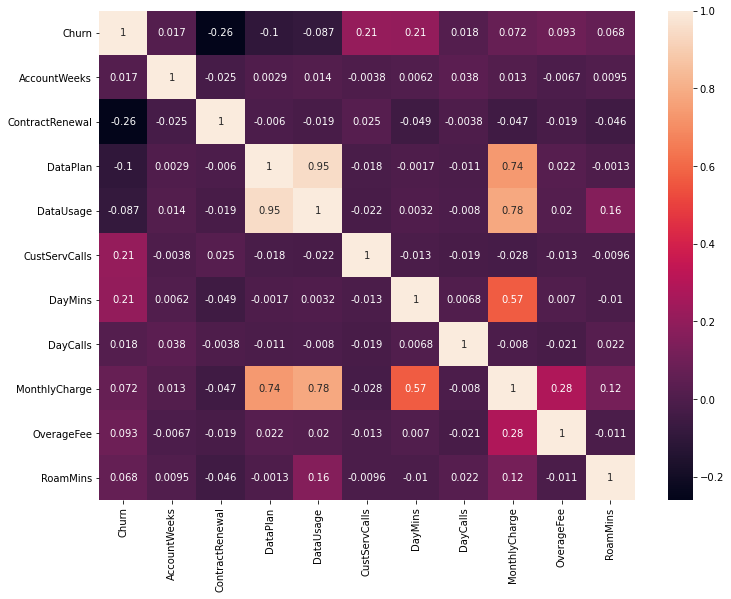

In [3]:
# heatmap correlation
plt.figure(figsize=(12,9))
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.savefig("heatmap.jpg")
plt.show()

In [4]:
# selecting feature
import numpy as np
columns = np.full((corrMatrix.shape[0],), True, dtype=bool)
for i in range(corrMatrix.shape[0]):
    for j in range(i+1, corrMatrix.shape[0]):
        if corrMatrix.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False

In [5]:
selected_columns = df.columns[columns]
selected_columns

Index(['Churn', 'AccountWeeks', 'ContractRenewal', 'DataPlan', 'CustServCalls',
       'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee', 'RoamMins'],
      dtype='object')

In [6]:
df = df[selected_columns]
df

,Churn,AccountWeeks,ContractRenewal,DataPlan,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,3,166.7,113,41.0,7.42,10.1
...,...,...,...,...,...,...,...,...,...,...
3328,0,192,1,1,2,156.2,77,71.7,10.78,9.9
3329,0,68,1,0,3,231.1,57,56.4,7.67,9.6
3330,0,28,1,0,2,180.8,109,56.0,14.44,14.1
3331,0,184,0,0,2,213.8,105,50.0,7.98,5.0


D:\Apps\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


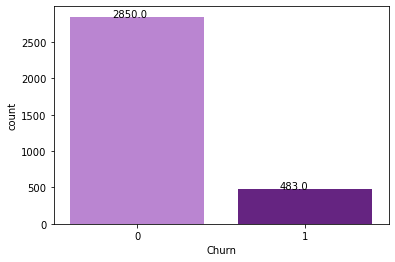

In [7]:
# Check Data Churn
ax = sns.countplot(df["Churn"], palette=['#bf78de', '#6b1491'])
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.savefig("unbalanced_countplot.jpg")

In [8]:
df["Churn"].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

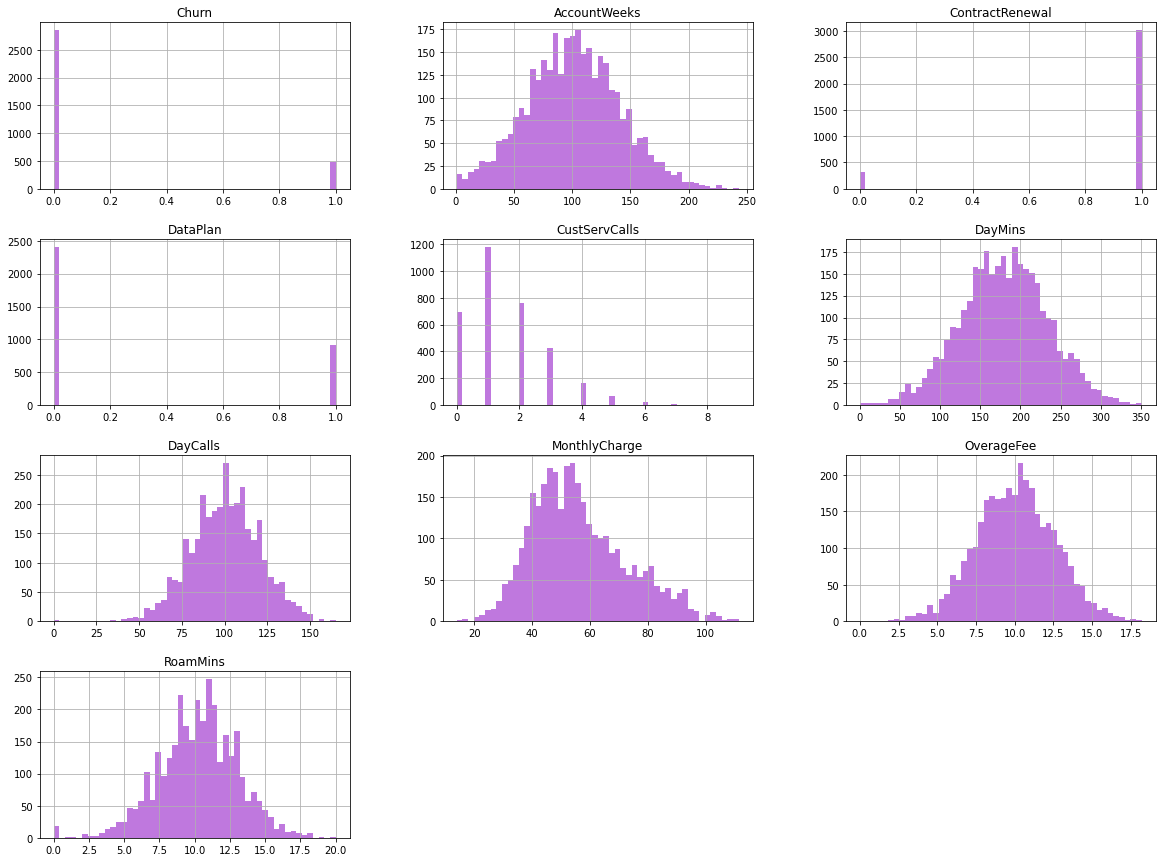

In [9]:
# histogram of all columns
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15),color='#bf78de')
plt.savefig("histogram_all.jpg")
plt.show()

In [10]:
# giving index to numerical column
nbin_var = df[['AccountWeeks', 'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee',
               'RoamMins']]
for i, v in enumerate(nbin_var):
    print(i,v)

0 AccountWeeks
1 CustServCalls
2 DayMins
3 DayCalls
4 MonthlyCharge
5 OverageFee
6 RoamMins


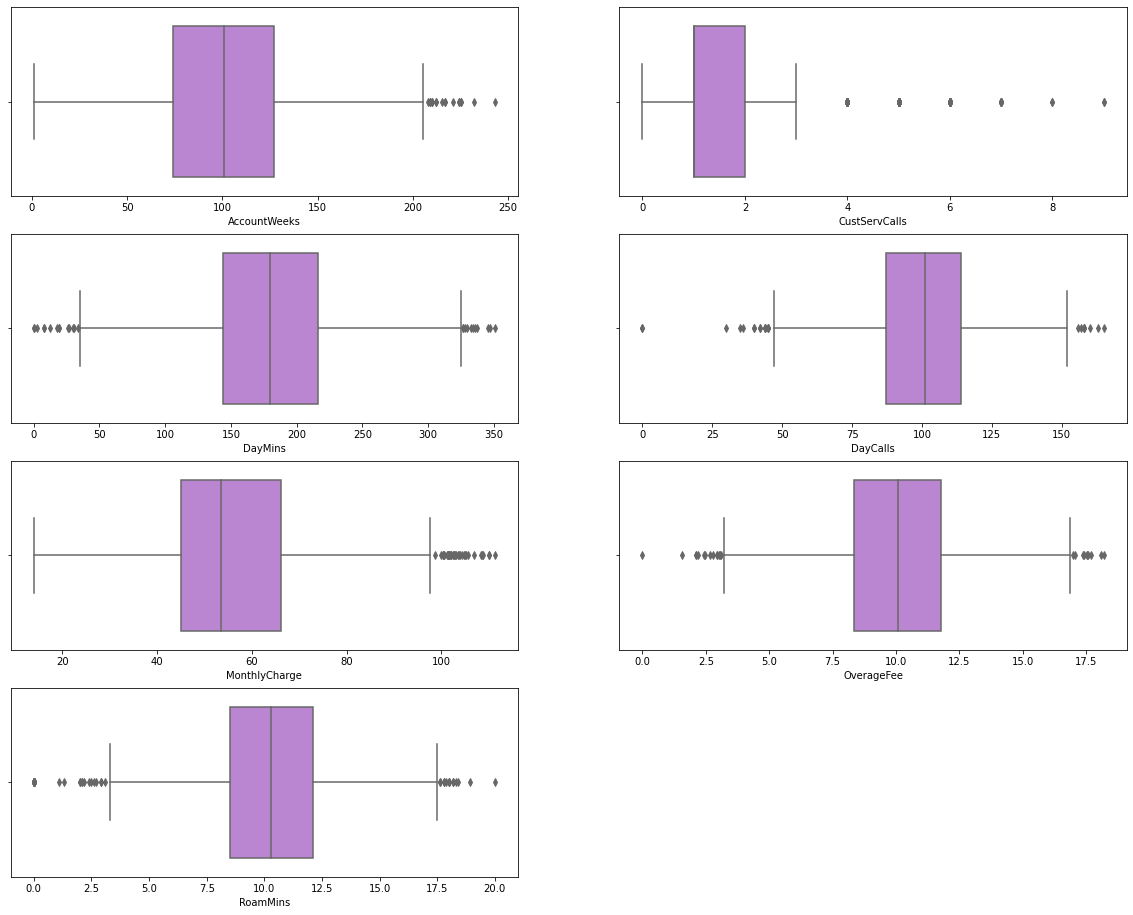

In [11]:
# boxplot
import matplotlib.pyplot as plt

# Set up figure
fig = plt.figure(figsize = (20,16))

# Plotting boxplots
nbin_var = df[['AccountWeeks', 'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee',
               'RoamMins']]
for i, v in enumerate(nbin_var):
    axes = fig.add_subplot(4, 2, i+1)
    sns.boxplot(x = v, data = df, ax = axes, color='#bf78de')

In [12]:
# Handling Outliers

def remove_outliers(data, col):
    
    global df_clean
    
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    
    iqr = q3-q1
    fence_low = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    
    df_clean = data.loc[(data[col] > fence_low) & (data[col] < fence_high)]
    return df_clean

cols = ['AccountWeeks', 'CustServCalls', 'DayMins', 'DayCalls',
        'MonthlyCharge', 'OverageFee', 'RoamMins']
for column in cols:
    df = remove_outliers(df, column)

In [13]:
df_clean

,Churn,AccountWeeks,ContractRenewal,DataPlan,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0,243.4,114,52.0,6.06,12.2
4,0,75,0,0,3,166.7,113,41.0,7.42,10.1
5,0,118,0,0,0,223.4,98,57.0,11.03,6.3
...,...,...,...,...,...,...,...,...,...,...
3327,0,79,1,0,2,134.7,98,40.0,9.49,11.8
3328,0,192,1,1,2,156.2,77,71.7,10.78,9.9
3329,0,68,1,0,3,231.1,57,56.4,7.67,9.6
3330,0,28,1,0,2,180.8,109,56.0,14.44,14.1


D:\Apps\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


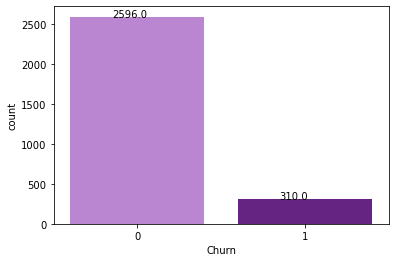

In [14]:
# Check Data Churn
ax = sns.countplot(df_clean["Churn"], palette=['#bf78de', '#6b1491'])
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.savefig("cleaned_countplot.jpg")

In [15]:
## Resampling
from sklearn.utils import resample

In [16]:
#create two different dataframe of majority and minority class 
df_majority = df_clean[(df['Churn']==0)] 
df_minority = df_clean[(df['Churn']==1)] 
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 2596, # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

In [17]:
df_upsampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5192 entries, 1359 to 3331
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            5192 non-null   int64  
 1   AccountWeeks     5192 non-null   int64  
 2   ContractRenewal  5192 non-null   int64  
 3   DataPlan         5192 non-null   int64  
 4   CustServCalls    5192 non-null   int64  
 5   DayMins          5192 non-null   float64
 6   DayCalls         5192 non-null   int64  
 7   MonthlyCharge    5192 non-null   float64
 8   OverageFee       5192 non-null   float64
 9   RoamMins         5192 non-null   float64
dtypes: float64(4), int64(6)
memory usage: 446.2 KB


D:\Apps\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


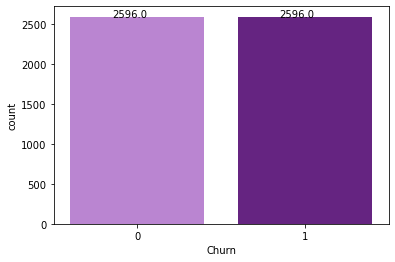

In [18]:
# Check Data Churn
ax = sns.countplot(df_upsampled["Churn"], palette=['#bf78de', '#6b1491'])
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.savefig("balanced_countplot.jpg")

In [19]:
## Modelling

In [20]:
# defining feature matrix(X) and response vector(y)
X = df_upsampled.loc[:, df.columns != 'Churn']
y = df_upsampled['Churn']

In [21]:
# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                   random_state=1)

In [22]:
# standardize the training and testing datasets
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [23]:
## Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)

classifier_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [25]:
classifier_rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': True,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [26]:
# Make predictions for the test set
y_pred_test = classifier_rf.predict(X_test)

In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# View accuracy score
accuracy_score(y_test, y_pred_test)

0.8585178055822906

In [28]:
# View the classification report for test data and predictions
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       502
           1       0.90      0.81      0.86       537

    accuracy                           0.86      1039
   macro avg       0.86      0.86      0.86      1039
weighted avg       0.86      0.86      0.86      1039



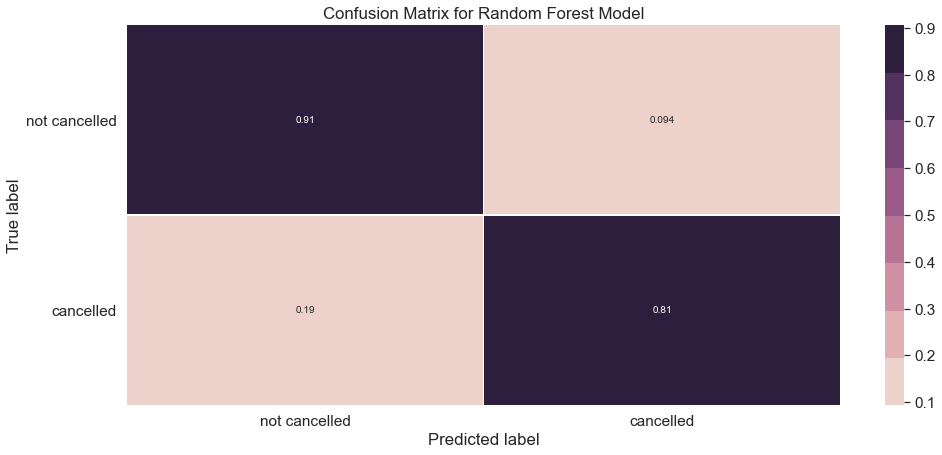

In [29]:
# Get and reshape confusion matrix data
import numpy as np

matrix = confusion_matrix(y_test, y_pred_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            linewidths=0.2, cmap=sns.cubehelix_palette(8))

# Add labels to the plot
class_names = ['not cancelled', 'cancelled']
tick_marks = np.arange(len(class_names)) + 0.5
tick_marks2 = tick_marks
plt.xticks(tick_marks, class_names, rotation=0)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.savefig("confusionmatrix_rf_1.jpg")
plt.show()

In [30]:
params = {
    'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    'min_samples_leaf': [3,5,7,10,15],
    'min_samples_split': [2,5,10],
    'n_estimators': [50,100,200,400,600]}

from sklearn.model_selection import ParameterGrid
param_size = ParameterGrid(params)
len(param_size)

750

In [31]:
from sklearn.model_selection import GridSearchCV

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=classifier_rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_result = grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 750 candidates, totalling 3000 fits


In [32]:
grid_result

GridSearchCV(cv=4,
             estimator=RandomForestClassifier(max_depth=5, n_jobs=-1,
                                              oob_score=True, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
                         'min_samples_leaf': [3, 5, 7, 10, 15],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200, 400, 600]},
             scoring='accuracy', verbose=1)

In [33]:
grid_result.best_score_

0.962918481717822

In [34]:
grid_result.best_params_

{'max_depth': 30,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 400}

In [35]:
rf_best = grid_result.best_estimator_
rf_best.fit(X_train, y_train)

RandomForestClassifier(max_depth=30, min_samples_leaf=3, n_estimators=400,
                       n_jobs=-1, oob_score=True, random_state=42)

In [36]:
## Evaluation

In [37]:
y_rf = rf_best.predict(X_test)

In [38]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_rf))

0.9345524542829644


In [39]:
from sklearn.metrics import precision_score
print(precision_score(y_test, y_rf, average='macro'))

0.9350706157096786


In [40]:
from sklearn.metrics import recall_score
print(recall_score(y_test, y_rf, average='macro'))

0.9353869438447329


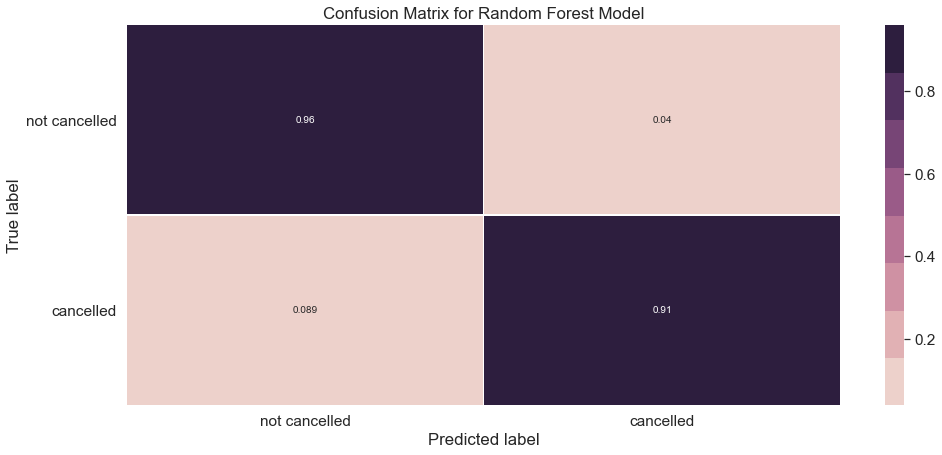

In [41]:
# Get and reshape confusion matrix data
import numpy as np

matrix = confusion_matrix(y_test, y_rf)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            linewidths=0.2, cmap=sns.cubehelix_palette(8))

# Add labels to the plot
class_names = ['not cancelled', 'cancelled']
tick_marks = np.arange(len(class_names)) + 0.5
tick_marks2 = tick_marks
plt.xticks(tick_marks, class_names, rotation=0)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.savefig("confusionmatrix_rf_fin.jpg")
plt.show()

In [42]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_rf, pos_label=1) # pos_label: positive label
print(auc(fpr, tpr))

0.9353869438447329


In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_rf))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93       502
           1       0.96      0.91      0.93       537

    accuracy                           0.93      1039
   macro avg       0.94      0.94      0.93      1039
weighted avg       0.94      0.93      0.93      1039



In [44]:
## Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='lbfgs', max_iter=1000)
lr = lr.fit(X_train, y_train)

In [46]:
lr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 1000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [47]:
# Make predictions for the test set
y_pred_test = lr.predict(X_test)

In [48]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# View accuracy score
accuracy_score(y_test, y_pred_test)

0.836381135707411

In [49]:
# View the classification report for test data and predictions
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.81      0.86      0.84       502
           1       0.86      0.82      0.84       537

    accuracy                           0.84      1039
   macro avg       0.84      0.84      0.84      1039
weighted avg       0.84      0.84      0.84      1039



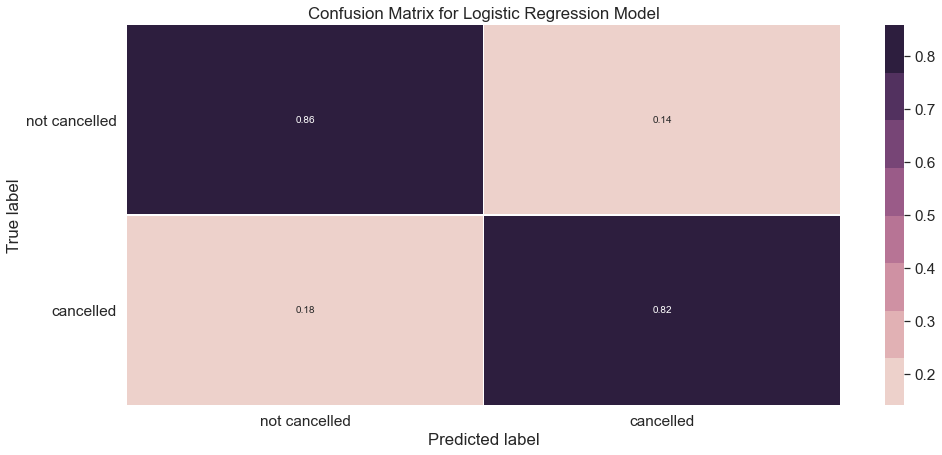

In [50]:
# Get and reshape confusion matrix data
import numpy as np

matrix = confusion_matrix(y_test, y_pred_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            linewidths=0.2, cmap=sns.cubehelix_palette(8))

# Add labels to the plot
class_names = ['not cancelled', 'cancelled']
tick_marks = np.arange(len(class_names)) + 0.5
tick_marks2 = tick_marks
plt.xticks(tick_marks, class_names, rotation=0)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Logistic Regression Model')
plt.savefig("confusionmatrix_lr_1.jpg")
plt.show()

In [71]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test, pos_label=1) # pos_label: positive label
print(auc(fpr, tpr))

0.8371040975761758


In [51]:
## Hyperparameter Tuning

In [52]:
import warnings
warnings.filterwarnings('ignore')

params = {'penalty' : ['l1', 'l2'],
          'C' : np.logspace(-3, 3, 7),
          'solver' : ['lbfgs', 'liblinear']}

from sklearn.model_selection import ParameterGrid
param_size = ParameterGrid(params)
len(param_size)

28

In [53]:
from sklearn.model_selection import GridSearchCV

# Instantiate the grid search model
grid_search = GridSearchCV(lr,
                           param_grid=params,
                           cv = 10,
                           scoring='accuracy')

grid_result = grid_search.fit(X_train, y_train)

In [54]:
grid_result

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear']},
             scoring='accuracy')

In [55]:
grid_result.best_score_

0.8213339898053753

In [56]:
grid_result.best_params_

{'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}

In [57]:
rf_best = grid_result.best_estimator_
rf_best.fit(X_train, y_train)

LogisticRegression(C=0.01, max_iter=1000, penalty='l1', solver='liblinear')

In [58]:
## Evaluation

In [61]:
y_lr = rf_best.predict(X_test)

In [62]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_lr))

0.8286814244465832


In [63]:
from sklearn.metrics import precision_score
print(precision_score(y_test, y_lr, average='macro'))

0.8288519973319499


In [64]:
from sklearn.metrics import recall_score
print(recall_score(y_test, y_lr, average='macro'))

0.8292008873259291


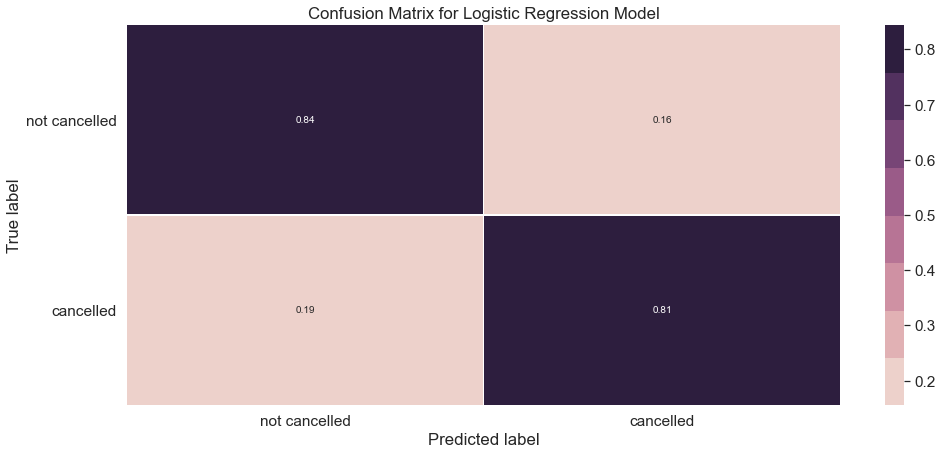

In [65]:
# Get and reshape confusion matrix data
import numpy as np

matrix = confusion_matrix(y_test, y_lr)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            linewidths=0.2, cmap=sns.cubehelix_palette(8))

# Add labels to the plot
class_names = ['not cancelled', 'cancelled']
tick_marks = np.arange(len(class_names)) + 0.5
tick_marks2 = tick_marks
plt.xticks(tick_marks, class_names, rotation=0)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Logistic Regression Model')
plt.savefig("confusionmatrix_lr_fin.jpg")
plt.show()

In [69]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_lr, pos_label=1) # pos_label: positive label
print(auc(fpr, tpr))

0.829200887325929


In [67]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_lr))

              precision    recall  f1-score   support

           0       0.81      0.84      0.83       502
           1       0.85      0.81      0.83       537

    accuracy                           0.83      1039
   macro avg       0.83      0.83      0.83      1039
weighted avg       0.83      0.83      0.83      1039

